<a href="https://colab.research.google.com/github/NopeSieun/machine_learning_pracrice/blob/main/HW3_202001996.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

202001996 안시은




In [4]:
from google.colab import drive #드라이브 끌어오기 
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray

(269, 221)


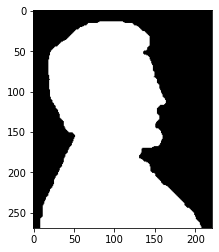

In [6]:
#binary로 변환하기

img1 = io.imread('/content/drive/MyDrive/DIgital_image/lincoln.png') #png이미지 불러오기 
plt.imshow(img1, cmap='gray') #png 흑백처리 
np.array(img1) #numpy 변환 -> binary 변환
print(img1.shape) #shape 확인

(889, 1019)


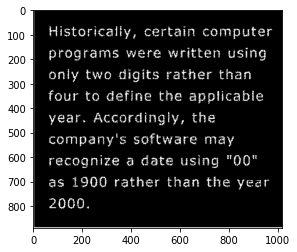

In [7]:
img2 = plt.imread('/content/drive/MyDrive/DIgital_image/text-broken.tif') #tif 파일은 plt를 이용해서 불러옴
plt.imshow(img2, cmap='gray') #png 흑백처리 
np.array(img2) #numpy 변환
img2 = img2[:,:,0] #3차원 array를 2차원 array로 변환
np.array(img2) #numpy 변환 -> binary 변환

print(img2.shape) #shape 확인

In [52]:
def myerode(img,SE):
  n, m = img.shape #img의 row와 column을 각각 n과 m에 대입 
  se = np.zeros((n+1, m+1)) #중심을 원점으로 갖는 structuring element 정의, img shape보다 큰 2차원 array 생성

  se[1:n+1, 1:m+1] = img.copy()
  erode = np.zeros_like(img) #img 사이즈만큼 array 생성, erosion 위한 준비

  for i in range(0,n,1): 
      for j in range(0,m,1):
          erode[i][j] = np.min(se[i:i+SE, j:j+SE]) #arry에서 min 결과 0이면 결과도 0(침식시킴), 1이면 1 그대로 결과 기록

  plt.imshow(erode, cmap = 'gray')


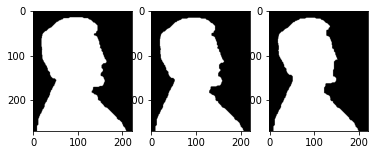

In [51]:
plt.subplot(131) #첫 번째 사진에 erosion 하기 전 그림을 나타냄 (비교용)
plt.imshow(img1, cmap = 'gray')

plt.subplot(132) #두 번째 사진으로 erosion 적용시킨 이후 그림 나타냄
myerode(img1,3) #원하는 se크기 대입 

plt.subplot(133) #두 번째 사진으로 erosion 적용시킨 이후 그림 나타냄
myerode(img1,10) #원하는 se크기 대입 

#코나 턱 부분을 집중해서 보면 차이를 확인할 수 있음.
#se 클수록 침식 정도가 커짐 

In [53]:
def mydliate(img,SE):
  n, m = img.shape #img의 row와 column을 각각 n과 m에 대입 
  se = np.zeros((n+1,m+1)) #중심을 원점으로 갖는 structuring element 정의, img shape보다 큰 2차원 array 생성
  
  se[1:n+1, 1:m+1] = img.copy()
  dilate = np.zeros_like(img) #img 사이즈만큼 array 생성, erosion 위한 준비

  for i in range(0,n,1):
    for j in range(0,m,1):
        dilate[i][j] = np.max(se[i:i+SE, j:j+SE]) #se크기에 맞춰 dilation 진행. erosion과 반대로 max값에 맞춰서 새롭게 array를 구성하면 됨. 

  plt.imshow(dilate, cmap = 'gray')


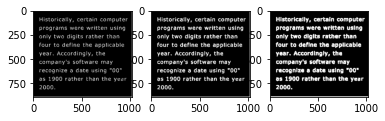

In [54]:
plt.subplot(131) #첫 번째 사진에 erosion 하기 전 그림을 나타냄 (비교용)
plt.imshow(img2, cmap = 'gray')

plt.subplot(132) #두 번째 사진으로 erosion 적용시킨 이후 그림 나타냄
mydliate(img2,3) #원하는 se크기 집어넣기

plt.subplot(133) #두 번째 사진으로 erosion 적용시킨 이후 그림 나타냄
mydliate(img2,6) #원하는 se크기 집어넣기

#글씨가 더 뚜렷해진 것을 확인할 수 있음.
#se크기가 클수록 팽창 정도가 커짐. 